# Import

In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),".."))

import copy
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV

In [2]:
data_folder = '20241010_041350_432090_1m_500'
data_dir = 'target_exp'
files_path = os.path.join(os.getcwd(),"..",'data', data_dir, data_folder, f"*.csv")
csv_files = glob.glob(files_path)

In [3]:
dfs = []
for csv_file in csv_files:
    temp_df = pd.read_csv(csv_file)
    dfs.append(temp_df)

df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df

(576, 54)


,charuco_id,u_c_t,v_c_t,x_c_t,y_c_t,z_c_t,u_g_l,v_g_l,u_g_r,v_g_r,...,state_theta_right_eye_pan,state_theta_eyes_tilt,err_u_l,err_v_l,err_u_r,err_v_r,err_x_b_l,err_y_b_l,err_x_b_r,err_y_b_r
0,48,368.76694,141.35493,-0.095780,-0.168237,1.000879,400.721505,238.436491,139.546724,252.199447,...,-4.042969,13.798828,-10.649178,0.148165,-14.232759,-2.208938,0.016217,-0.000763,0.021636,0.002938
1,49,449.77576,140.02446,0.040117,-0.171347,1.005816,400.721505,238.436491,139.546724,252.199447,...,0.878906,13.623047,-500.721505,-338.436491,-12.132150,-1.066283,-101.088000,-100.544000,0.018592,0.001579
2,50,530.06250,138.58273,0.175972,-0.174433,1.010797,400.721505,238.436491,139.546724,252.199447,...,5.712891,13.183594,-500.721505,-338.436491,-11.093660,-0.735930,-101.224000,-100.544000,0.017412,0.000845
3,62,370.47080,222.30170,-0.092536,-0.032323,0.997258,400.721505,238.436491,139.546724,252.199447,...,-3.955078,-6.591797,-8.343362,3.570543,-12.394983,0.762239,0.012821,-0.006037,0.018635,-0.001152
4,63,451.82507,220.57678,0.043323,-0.035433,1.002217,400.721505,238.436491,139.546724,252.199447,...,0.966797,-6.855469,-500.721505,-338.436491,-12.049142,1.724046,-101.088000,-100.680000,0.018061,-0.002426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,63,451.57990,220.51596,0.042840,-0.035514,1.002175,400.721505,238.436491,139.546724,252.199447,...,3.779297,0.000000,-13.301034,1.245760,-11.731118,1.219209,0.021057,-0.001908,0.017509,-0.001400
572,64,531.89685,218.93973,0.178715,-0.038597,1.007205,400.721505,238.436491,139.546724,252.199447,...,8.261719,0.000000,-500.721505,-338.436491,-5.073961,0.802323,-101.224000,-100.680000,0.008282,-0.001089
573,76,371.82880,303.89328,-0.089791,0.103508,0.993582,400.721505,238.436491,139.546724,252.199447,...,-0.966797,-19.775391,-8.830697,-2.482023,-15.653947,-5.080977,0.013917,0.004684,0.024037,0.009271
574,77,453.46527,301.83356,0.046081,0.100403,0.998569,400.721505,238.436491,139.546724,252.199447,...,3.691406,-19.687500,-14.457009,-3.725447,-11.888627,-4.552077,0.024733,0.006929,0.018755,0.008257


In [4]:
# Filtered df
temp_df = df[~df.isin([-100.0]).any(axis=1)]
valid_df = temp_df[~temp_df.isin([-180.17578125]).any(axis=1)]
valid_df = valid_df.reset_index(drop=True)
print('Valid:',len(valid_df))
print('Removed:', len(df)-len(valid_df))
valid_df.head()

Valid: 396
Removed: 180


,charuco_id,u_c_t,v_c_t,x_c_t,y_c_t,z_c_t,u_g_l,v_g_l,u_g_r,v_g_r,...,state_theta_right_eye_pan,state_theta_eyes_tilt,err_u_l,err_v_l,err_u_r,err_v_r,err_x_b_l,err_y_b_l,err_x_b_r,err_y_b_r
0,48,368.76694,141.35493,-0.095780,-0.168237,1.000879,400.721505,238.436491,139.546724,252.199447,...,-4.042969,13.798828,-10.649178,0.148165,-14.232759,-2.208938,0.016217,-0.000763,0.021636,0.002938
1,62,370.47080,222.30170,-0.092536,-0.032323,0.997258,400.721505,238.436491,139.546724,252.199447,...,-3.955078,-6.591797,-8.343362,3.570543,-12.394983,0.762239,0.012821,-0.006037,0.018635,-0.001152
2,76,372.16946,303.94760,-0.089311,0.103603,0.993668,400.721505,238.436491,139.546724,252.199447,...,-3.867188,-26.367188,-9.498605,-2.148237,-12.378244,-5.768142,0.015195,0.003834,0.019108,0.010492
3,77,453.76282,301.85483,0.046558,0.100507,0.998648,400.721505,238.436491,139.546724,252.199447,...,0.791016,-26.455078,-14.107461,-3.976942,-12.443391,-5.557082,0.024148,0.007120,0.019740,0.009887
4,48,368.36728,141.30388,-0.096341,-0.168316,1.000760,400.721505,238.436491,139.546724,252.199447,...,-1.142578,19.951172,-11.381265,-17.852522,-12.154886,-21.132613,0.017086,0.029941,0.018602,0.033567


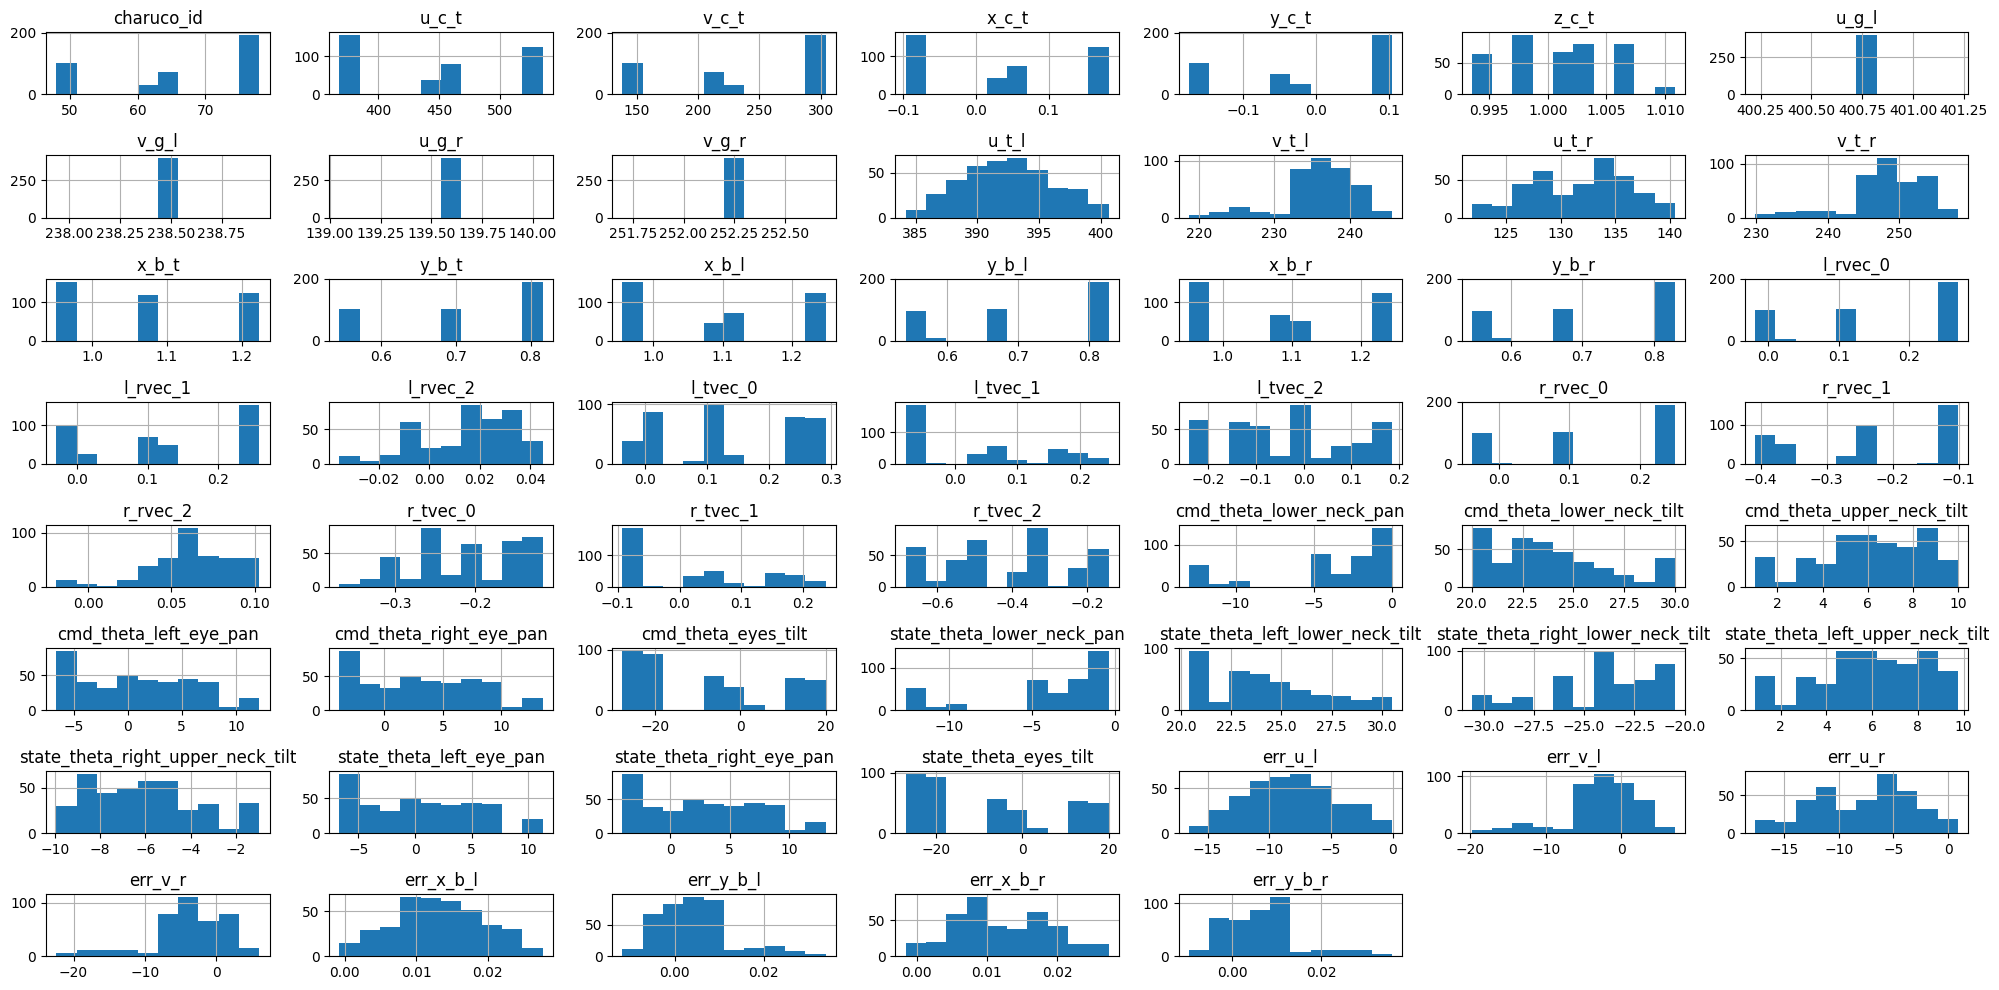

In [5]:
valid_df.hist(figsize=(20,10))
plt.tight_layout()
plt.show()

# Plotting

## Chessboard Projection

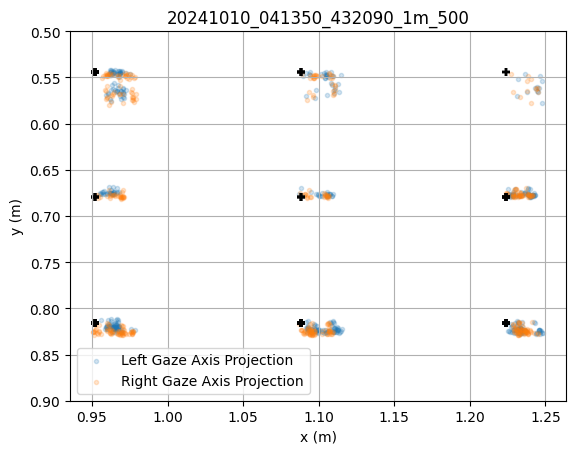

In [24]:
plt.figure()
plt.scatter(valid_df['x_b_l'],valid_df['y_b_l'], marker='.', alpha=0.2)
plt.scatter(valid_df['x_b_r'],valid_df['y_b_r'], marker='.', alpha=0.2)
plt.legend(['Left Gaze Axis Projection','Right Gaze Axis Projection'])
plt.scatter(valid_df['x_b_t'],valid_df['y_b_t'], marker='+', color='black')
plt.ylim([0.9,0.5])
plt.title(data_folder)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()

# Median

In [9]:
df_list = []
for id in valid_df['charuco_id'].unique():
    df = valid_df[valid_df['charuco_id']==id].copy()
    df_list.append(df)

In [12]:
l_x_median_list = []
l_y_median_list = []
r_x_median_list = []
r_y_median_list = []
for i in range(len(df_list)):
    l_x_median_list.append(np.median(df_list[i]['x_b_l']))
    l_y_median_list.append(np.median(df_list[i]['y_b_l']))
    r_x_median_list.append(np.median(df_list[i]['x_b_r']))
    r_y_median_list.append(np.median(df_list[i]['y_b_r']))

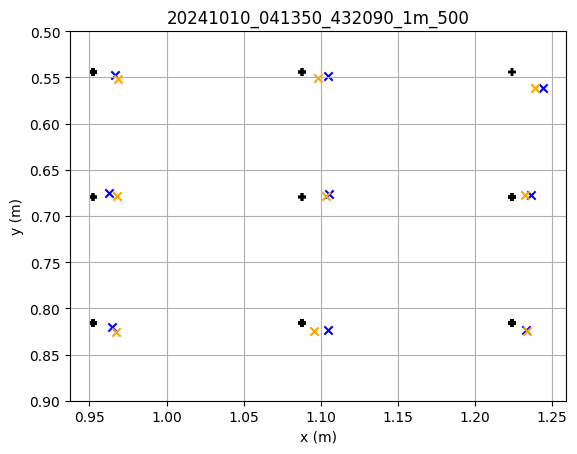

In [17]:
plt.figure()
plt.scatter(valid_df['x_b_t'],valid_df['y_b_t'], marker='+', color='black')
plt.scatter(l_x_median_list,l_y_median_list,color='blue',marker='x')
plt.scatter(r_x_median_list,r_y_median_list,color='orange',marker='x')
plt.ylim([0.9,0.5])
plt.title(data_folder)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()

# Pixel

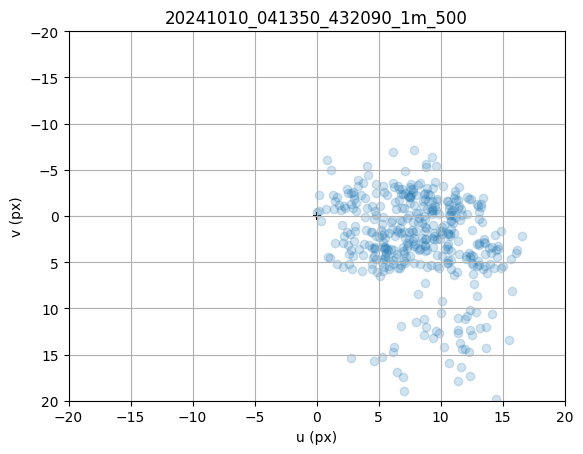

In [21]:
plt.figure()
plt.scatter(0,0, marker='+', color='black')
plt.scatter(-valid_df['err_u_l'],-valid_df['err_v_l'],alpha=0.2)
plt.title(data_folder)
plt.xlabel('u (px)')
plt.ylabel('v (px)')
plt.ylim([20,-20])
plt.xlim([-20,20])
plt.grid()

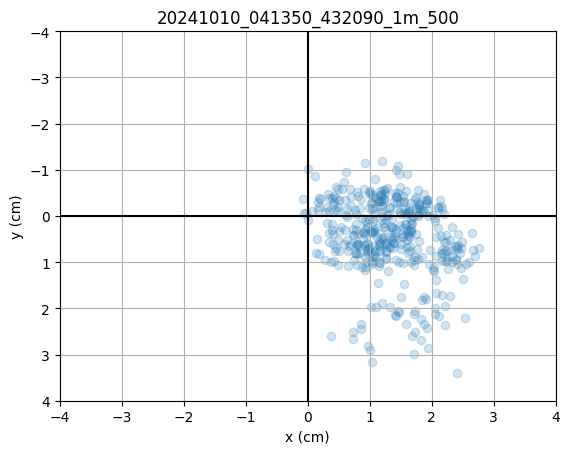

In [31]:
plt.figure()
plt.scatter(0,0, marker='+', color='black')
plt.scatter(100*valid_df['err_x_b_l'],100*valid_df['err_y_b_l'],alpha=0.2)
plt.title(data_folder)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.xlim([-4,4])
plt.ylim([4,-4])
plt.grid()

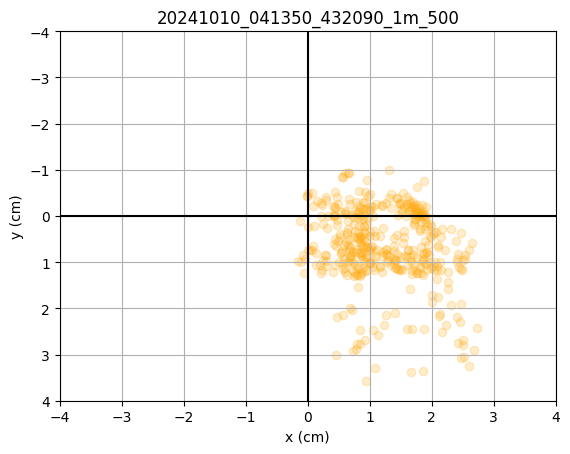

In [32]:
plt.figure()
plt.scatter(0,0, marker='+', color='black')
plt.scatter(100*valid_df['err_x_b_r'],100*valid_df['err_y_b_r'],alpha=0.2, color='orange')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title(data_folder)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.xlim([-4,4])
plt.ylim([4,-4])
plt.grid()